# ブロック線図

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RIPES-ACROSS/Control-System-Design-and-Application/blob/master/06_Block_Signalflow_diagram/block_diagram.ipynb)

## シグナルフロー線図モジュールのインストール

- https://github.com/qrqiuren/PySFG

In [1]:
! pip install pysfg
! pip install strictyaml

## モジュールの読込

In [2]:
from pylab import *
import math
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import sympy as sy
sy.init_printing(use_latex=True)
import pysfg

## Q 下記のブロック線図を減らし，単一の伝達関数を求めよ

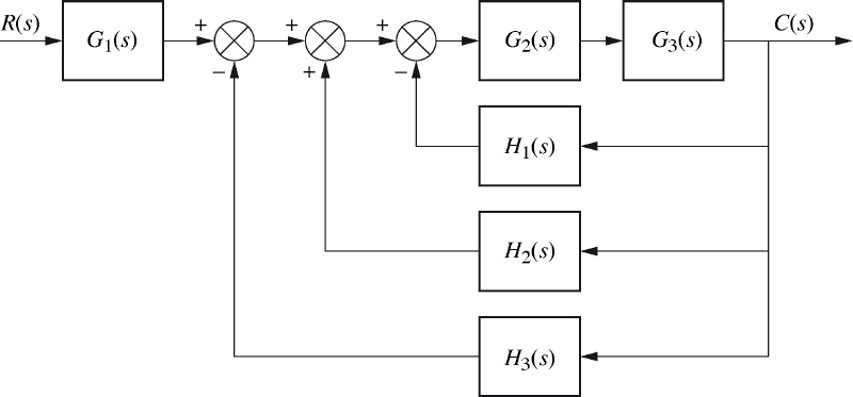

In [3]:
from IPython.display import Image
Image("./ex_block1.jpg")

In [4]:
R, G1, G2, G3, H1, H2, H3, C = sy.symbols('R G1 G2 G3 H1 H2 H3 C')

### フィードバック形式を等価な伝達関数に変換する

\begin{align}
    \begin{cases}
        R(s)G_1(s) - C(s)H_1(s) + C(s)H_2(s) -C(s)H_3(s)  = \varepsilon \\
        \varepsilon(s)G_2(s)G_3(s) = C(s)
    \end{cases}
\end{align}

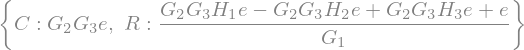

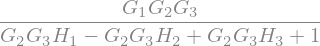

In [5]:
e = sy.Symbol('e')
sol = sy.solve([R*G1 - C*H1 +C*H2-C*H3 - e, e*G2*G3 - C], [C, R])
Gen = sy.simplify(sol[C]/sol[R])

display(sol, Gen)

## Q シグナルフロー線図から単一の伝達関数を求めよ

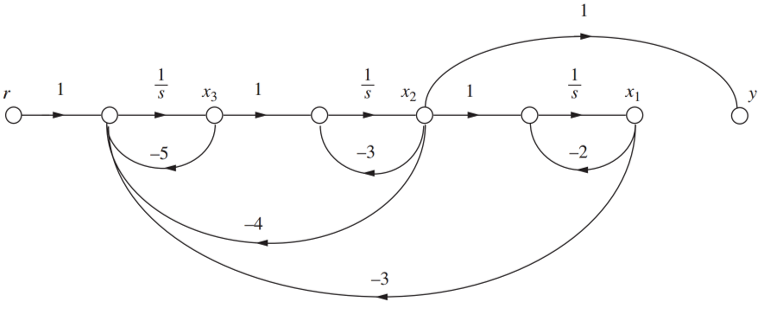

In [6]:
from IPython.display import Image
Image("./ex_signal1.png")

In [7]:
with open('./twoport.yml') as f:
    lines = f.read().splitlines()
for line in lines:
    print(line)

sources:
    - r
sinks:
    - y
nodes:
    - x1
    - x1d
    - x2
    - x2d
    - x3
    - x3d

edges:
    r ~> x3d: 1
    x3d ~> x3: 1/s
    x3 ~> x2d: 1
    x3 ~> x3d: -5
    x2d ~> x2: 1/s
    x2 ~> y: 1
    x2 ~> x1d: 1
    x2 ~> x2d: -3
    x2 ~> x3d: -4
    x1d ~> x1: 1/s
    x1 ~> x1d: -2
    x1 ~> x3d: -3


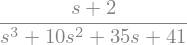

In [8]:
sfg = pysfg.SignalFlowGraph('./twoport.yml')
tf = sfg.find_graph_gain('r', 'y')

sy.simplify(tf)